In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pytesseract
from PIL import Image
import pandas as pd

In [4]:
path = '/content/7page-0.jpg'

sample = pytesseract.image_to_data(path, output_type='data.frame')
sample

In [5]:
# sample[100:150]

In [6]:
sample.to_csv('/content/test.csv', index=False)

## Original Image

In [14]:
print(pytesseract.image_to_string('/content/1page-0.PNG',config="--psm 6"))

&-
EUROCORPORATION
PRODUTTORE D&D Costruzioni SRL CLIENTE D&D Costruzioni SRL

PORTA ROMANA - VIA METASTASIO 48 50124 (FI) Mario Nobile - Mob. 3381558401

FABRIZIO PIPOLO CF Produttore 06725110487

3357566640 Email Cliente info@ddcostruzioni.net

23/02/2022 08:00 Email Produttore | info@ddcostruzioni.net

OE

| Mattina | Dalle 08:00 Alle 12:00 PER LA LOGISTICA:
CHIAMARE PER COMUNICARE ORARIO Florec 3200436592
https://www.google.com/maps/@43.7602578,11.2378078,3a, 75y
,244.78h,76.14t/data=!3m7!1e1!3m5!
1sd6ERXwcpkiHcDdpt_LkqMA!2e0!6shttps:%2F%
2Fstreetviewpixels-pa.googleapis.com%2Fv1%2Fthumbnail%
3Fpanoid%3Dd6ERXwcpkiHcDdpt_LkqMA%26cb_client%
3Dmaps-_sv.tactile.gps%26w%3D203%26h%3D100%26yaw%
3D322.34424%26pitch%3D0%26thumbfov%3D100!7i116384!
818192

170904.1 Calcinacci puliti Solido non pulverulento El
EUROCORPORATION
EUROCORPORATION S.r.I. C.F. - P.iva 05235640488 R.E.A. 531452 Capitale Sociale € 100.000,000
Via de’ Cattani 178 - 50145 Firenze | Tel. 055 7222419 Fax 055 7227520
info@e

## Gray Scale Image

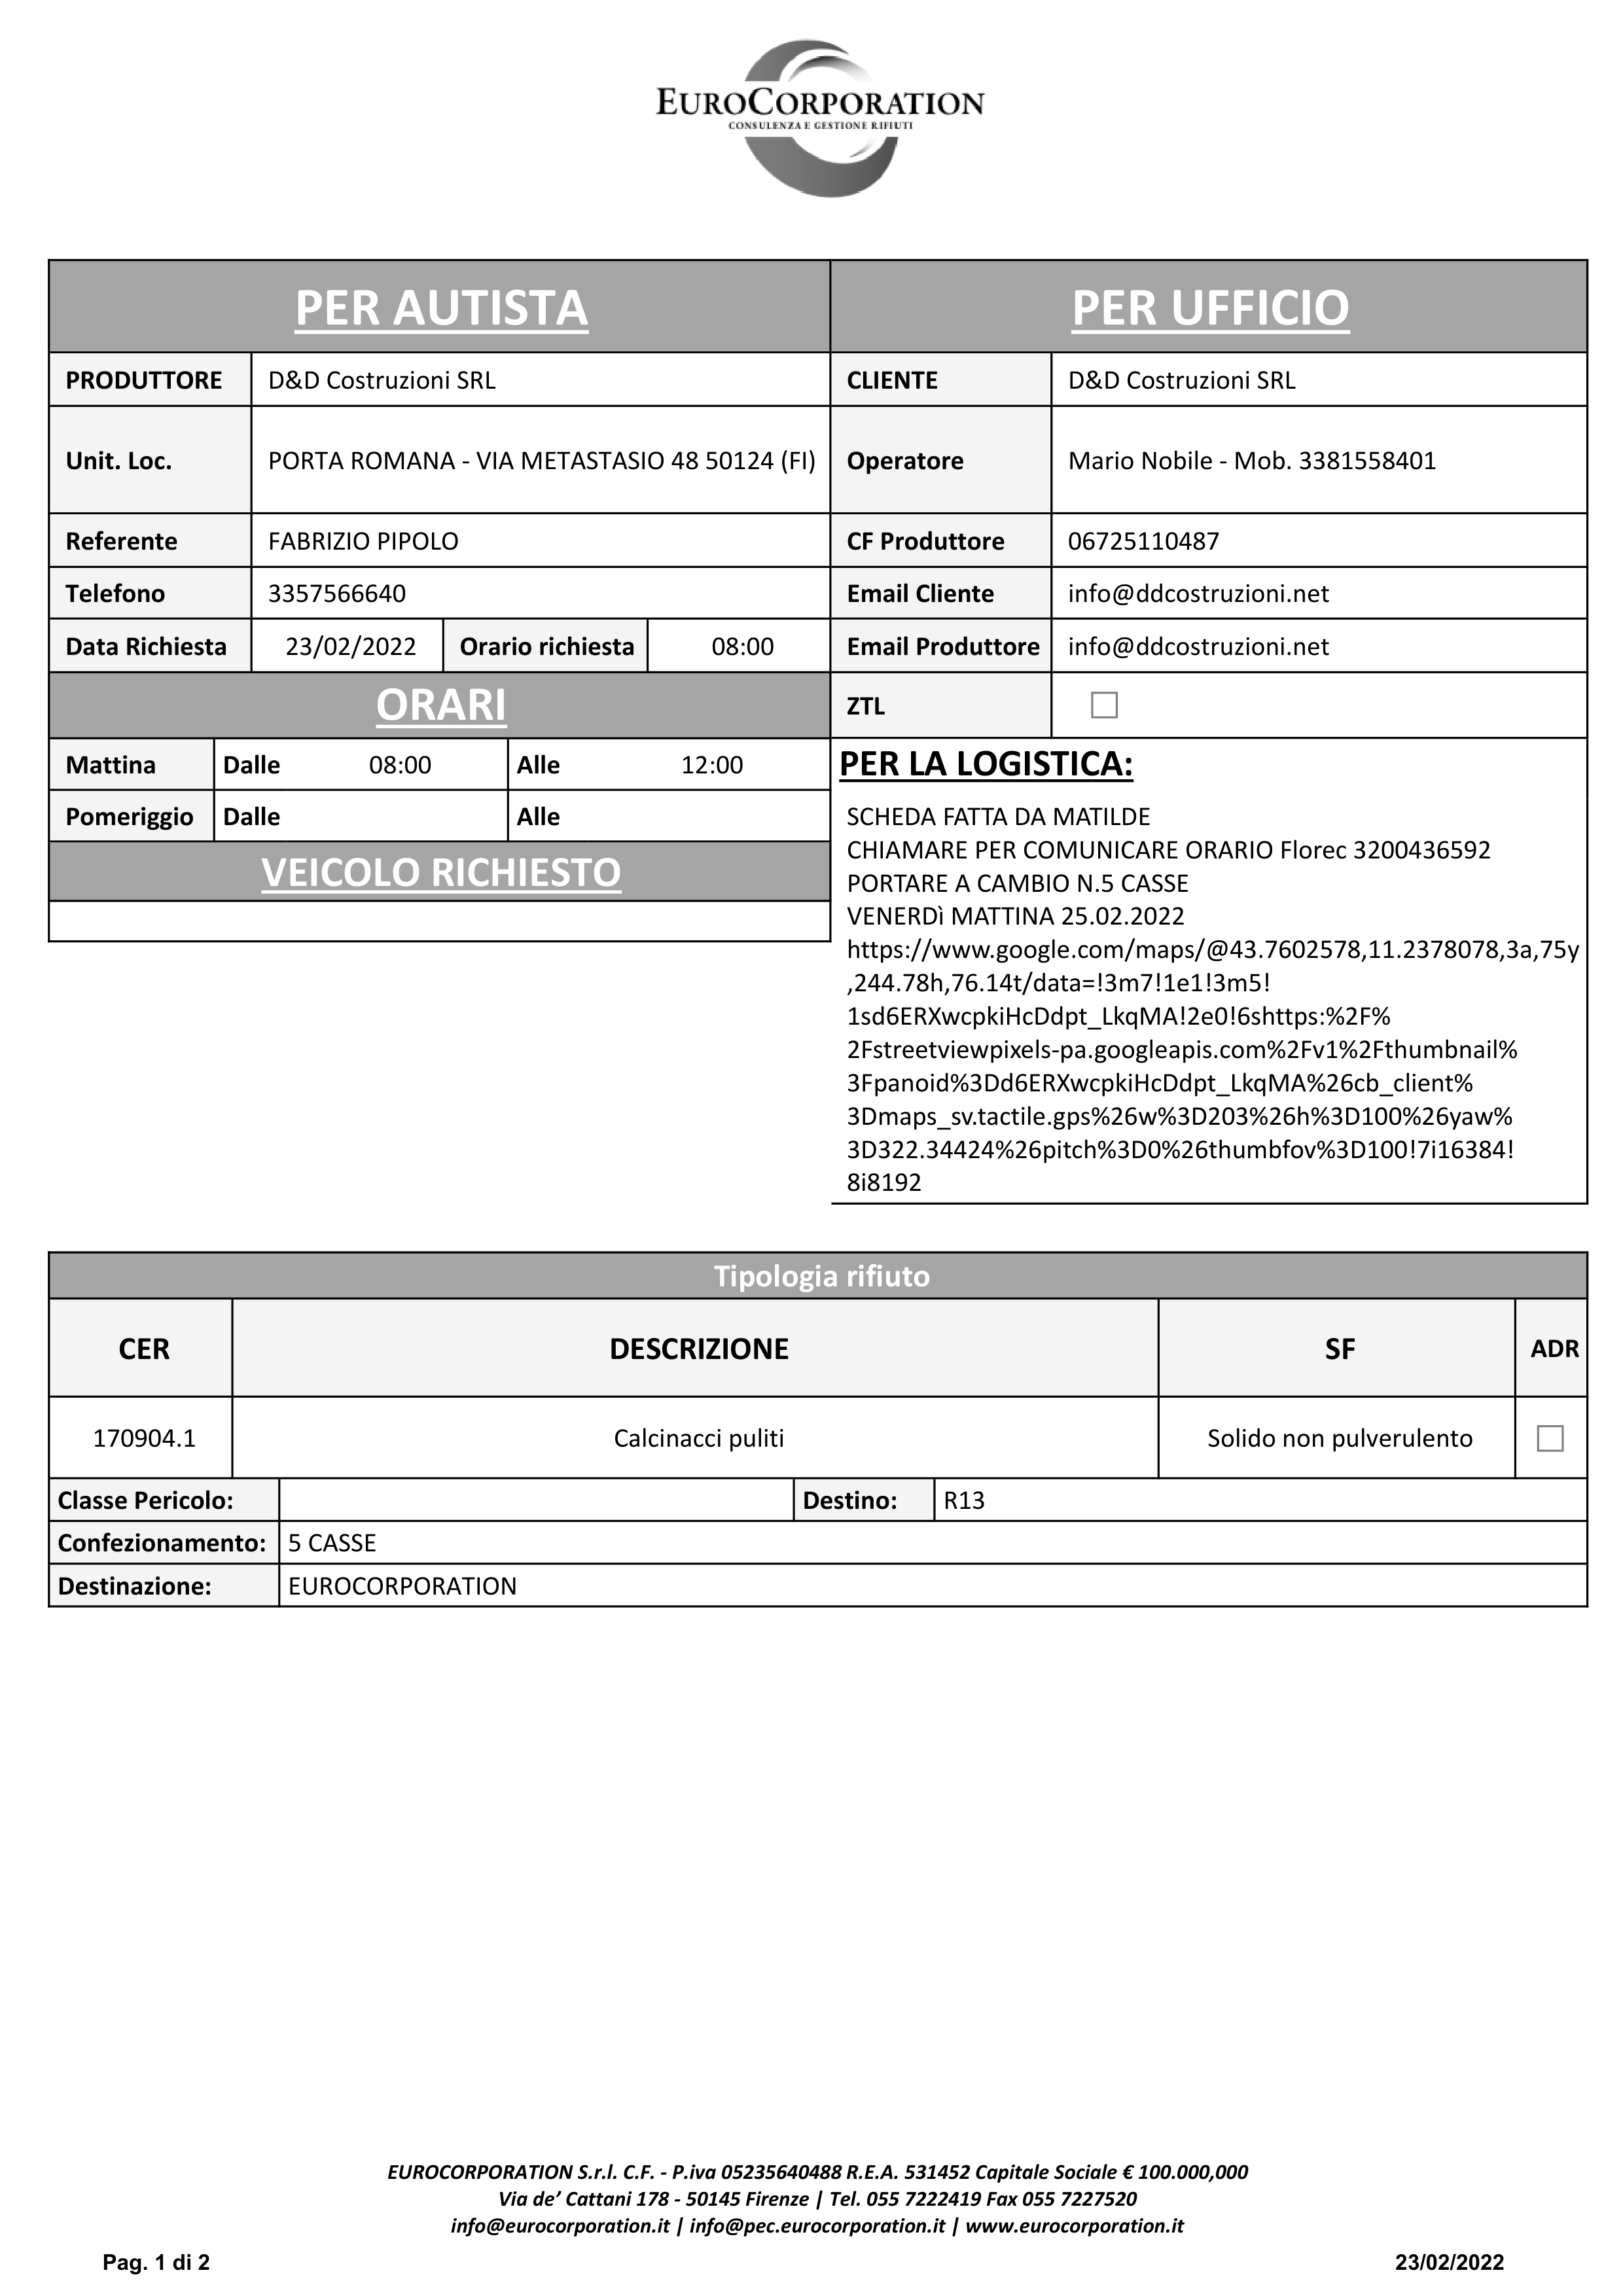

a
EUROCORPORATION
PRODUTTORE D&D Costruzioni SRL CLIENTE D&D Costruzioni SRL

PORTA ROMANA - VIA METASTASIO 48 50124 (FI) Mario Nobile - Mob. 3381558401

FABRIZIO PIPOLO CF Produttore 06725110487

3357566640 Email Cliente info@ddcostruzioni.net

23/02/2022 08:00 Email Produttore | info@ddcostruzioni.net

OE

| Mattina | Dalle 08:00 Alle 12:00 PER LA LOGISTICA:
CHIAMARE PER COMUNICARE ORARIO Florec 3200436592
https://www.google.com/maps/@43.7602578,11.2378078,3a, 75y
,244.78h,76.14t/data=!3m7!1e1!3m5!
1sd6ERXwcpkiHcDdpt_LkqMA!2e0!6shttps:%2F%
2Fstreetviewpixels-pa.googleapis.com%2Fv1%2Fthumbnail%
3Fpanoid%3Dd6ERXwcpkiHcDdpt_LkqMA%26cb_client%
3Dmaps-_sv.tactile.gps%26w%3D203%26h%3D100%26yaw%
3D322.34424%26pitch%3D0%26thumbfov%3D100!7i116384!
818192

170904.1 Calcinacci puliti Solido non pulverulento El
EUROCORPORATION
EUROCORPORATION S.r.I. C.F. - P.iva 05235640488 R.E.A. 531452 Capitale Sociale € 100.000,000
Via de’ Cattani 178 - 50145 Firenze | Tel. 055 7222419 Fax 055 7227520
info@eu

True

In [15]:
import cv2
import pytesseract

# Path for Windows
# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Read in image as grayscale
image = cv2.imread('/content/1page-0.PNG')
# Threshold to obtain binary image
gry = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# thresh = cv2.threshold(gry, 220, 255, cv2.THRESH_BINARY)[1]

# # Create custom kernel
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
# # Perform closing (dilation followed by erosion)
# close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Invert image to use for Tesseract
# result = 255 - close
from google.colab.patches import cv2_imshow
# cv2_imshow(thresh)
# cv2_imshow(close)
cv2_imshow(gry)

# Throw image into tesseract
print(pytesseract.image_to_string(gry,config="--psm 6"))
cv2.waitKey()
cv2.imwrite('image.png',gry)

### Thresholding Image

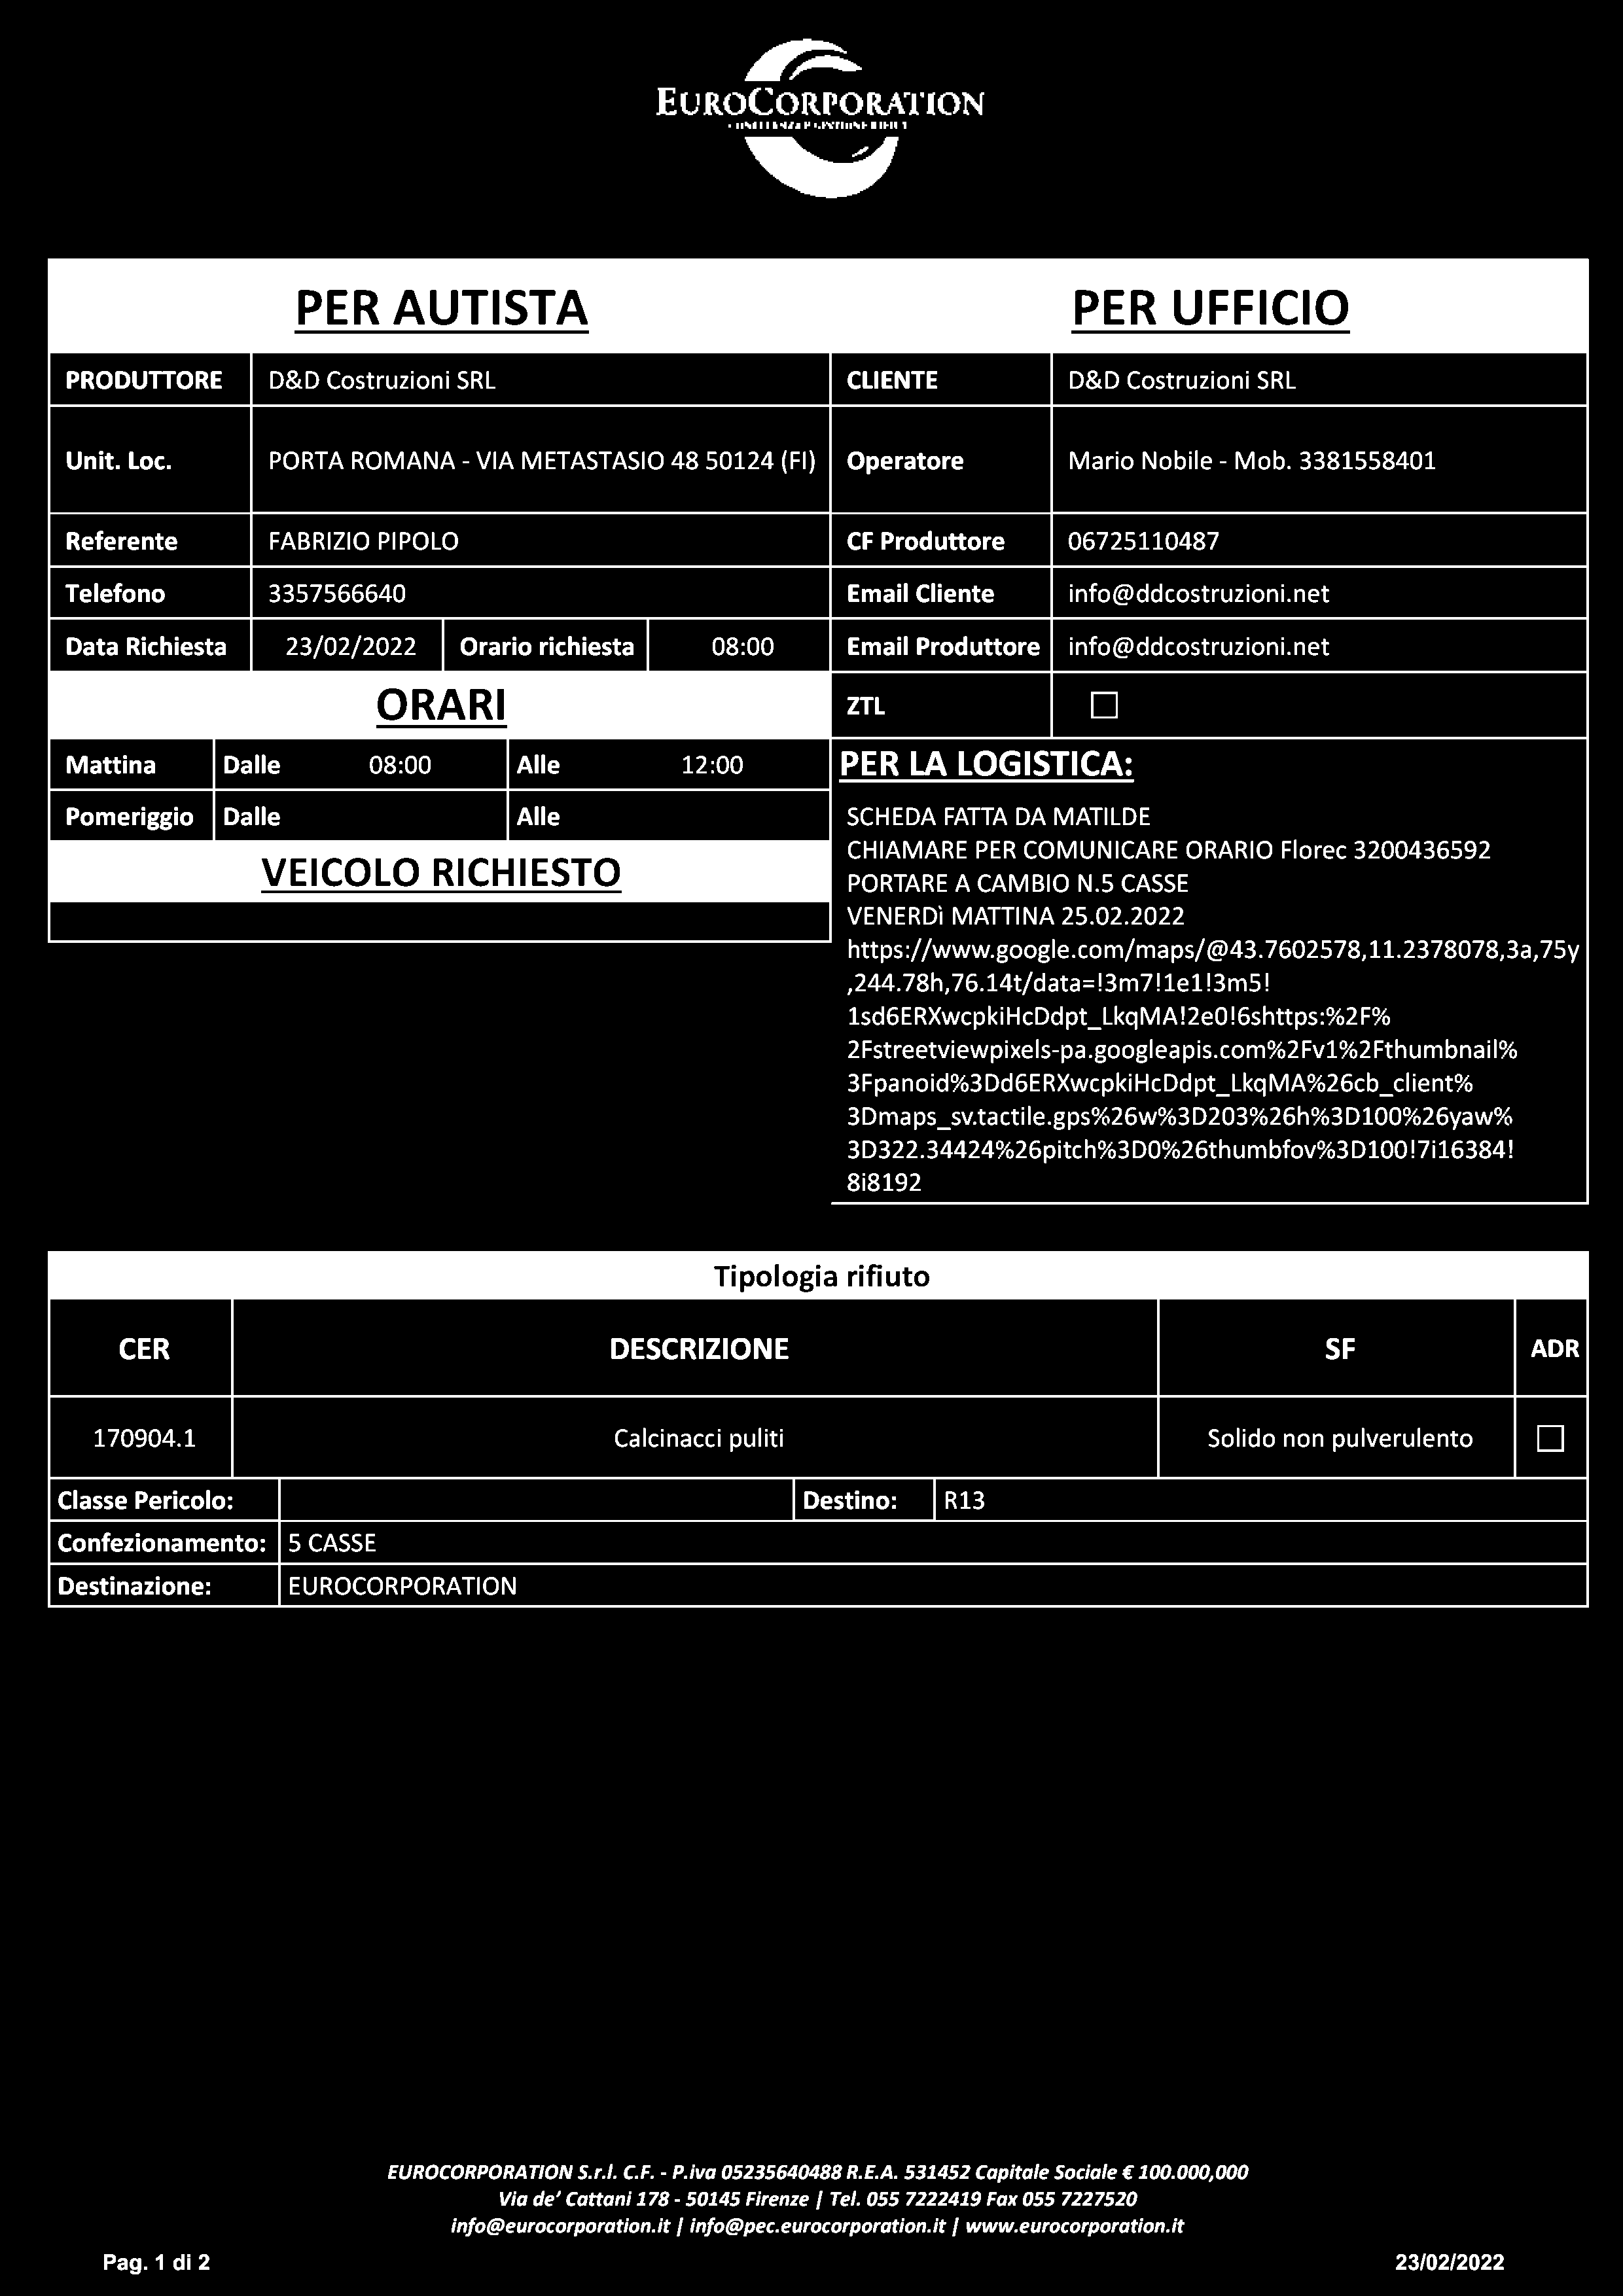

yA
EUROCORPORATION
ww
PRODUTTORE D&D Costruzioni SRL eR a3 D&D Costruzioni SRL
a PORTA ROMANA - VIA METASTASIO 48 50124 (FI) Mario Nobile - Mob. 3381558401
FABRIZIO PIPOLO CF Produttore 06725110487
3357566640 TET ee 8 info@ddcostruzioni.net
Dee teal =e 6) 23/02/2022 08:00 Email Produttore | info@ddcostruzioni.net
ORARI En =
Cee Pe RO Alle 12:00 PER LA LOGISTICA:
CHIAMARE PER COMUNICARE ORARIO Florec 3200436592
VEICOLO RICHIESTO PORTARE A CAMBIO N.5 CASSE
https://www.google.com/maps/@43.7602578, 11.2378078,3a,75y
,244.78h,76.14t/data=!3m7!1e1!3m5!
1sd6ERXwcpkiHcDdpt_LkqMA!2e0!6shttps:%2F%
2Fstreetviewpixels-pa.googleapis.com%2Fv1%2Fthumbnail%
3Fpanoid%3Dd6ERXwcpkiHcDdpt_LkqMA%26cb_client%
3Dmaps_sv.tactile.gps%26w%3D203%26h%3D100%26yaw%
3D322.34424%26pitch%3D0%26thumbfov%3D100!7i116384!
818192
Tipologia rifiuto
70) [el a Calcinacci puliti Solido non pulverulento El
EUROCORPORATION
EUROCORPORATION S.r.I. C.F. - P.iva 05235640488 R.E.A. 531452 Capitale Sociale € 100.000,000
Via de’ Cattan

-1

In [13]:
import cv2
import pytesseract

# Path for Windows
# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Read in image as grayscale
image = cv2.imread('/content/1page-0.PNG')
# Threshold to obtain binary image
gry = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gry, 220, 255, cv2.THRESH_BINARY)[1]

# # Create custom kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
# # Perform closing (dilation followed by erosion)
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Invert image to use for Tesseract
result = 255 - close
from google.colab.patches import cv2_imshow
# cv2_imshow(thresh)
# cv2_imshow(close)
cv2_imshow(result)

# Throw image into tesseract
print(pytesseract.image_to_string(result,config="--psm 6"))
cv2.waitKey()